In [2]:
import kwant
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# define a Haldane system
def make_syst_topo(r=30, a=1, t=1, t2=0.5):
    syst = kwant.Builder()
    lat = kwant.lattice.honeycomb(a, norbs=1, name=['a', 'b'])

    def circle(pos):
        x, y = pos
        return x ** 2 + y ** 2 < r ** 2

    syst[lat.shape(circle, (0, 0))] = 0.
    syst[lat.neighbors()] = t
    
    # add second neighbours hoppings: kwant version:
    syst[lat.a.neighbors()] = 1j * t2
    syst[lat.b.neighbors()] = -1j * t2
    
    # add second neighbors hoppings: my version:
    A_hoppings = [(())]
    
    syst.eradicate_dangling()

    return lat, syst

In [4]:
a = 1
lat = kwant.lattice.honeycomb(a, norbs=1, name=['a', 'b'])

In [5]:
lat.a.neighbors()

[HoppingKind((1, 0), kwant.lattice.Monatomic([[1.0, 0.0], [0.5, 0.8660254037844386]], [0.0, 0.0], 'a', 1)),
 HoppingKind((1, -1), kwant.lattice.Monatomic([[1.0, 0.0], [0.5, 0.8660254037844386]], [0.0, 0.0], 'a', 1)),
 HoppingKind((0, 1), kwant.lattice.Monatomic([[1.0, 0.0], [0.5, 0.8660254037844386]], [0.0, 0.0], 'a', 1))]

In [6]:
lat.b.neighbors()

[HoppingKind((1, 0), kwant.lattice.Monatomic([[1.0, 0.0], [0.5, 0.8660254037844386]], [0.0, 0.5773502691896258], 'b', 1)),
 HoppingKind((1, -1), kwant.lattice.Monatomic([[1.0, 0.0], [0.5, 0.8660254037844386]], [0.0, 0.5773502691896258], 'b', 1)),
 HoppingKind((0, 1), kwant.lattice.Monatomic([[1.0, 0.0], [0.5, 0.8660254037844386]], [0.0, 0.5773502691896258], 'b', 1))]

In [7]:
# dir(lat)

In [8]:
lat.prim_vecs

array([[1.       , 0.       ],
       [0.5      , 0.8660254]])

In [9]:
np.cos(np.pi/6)

0.8660254037844387

In [10]:
lat.sublattices

[kwant.lattice.Monatomic([[1.0, 0.0], [0.5, 0.8660254037844386]], [0.0, 0.0], 'a', 1),
 kwant.lattice.Monatomic([[1.0, 0.0], [0.5, 0.8660254037844386]], [0.0, 0.5773502691896258], 'b', 1)]

In [11]:
1/np.sqrt(3)

0.5773502691896258

In [12]:
lattice, syst = make_syst_topo(r=3)
A, B = lattice.sublattices

In [13]:
def family_colors(site):
    return 'w' if site.family == A else 'k' if site.family == B else 'r'

def hopping_colors(site1, site2):
#         if (site1.family==A and site1.family==site2.family) and (site1.tag == np.array([0,0]) or site2.tag == np.array([0,0])): # and site1.tag == np.array([0,0]) and site1.family==A:
#             color = 'red'
        if site1.family == site2.family:
            color='blue'
        else:
            color='black'
        return color

def hopping_lw(site1, site2):
    return 0.04 if site1.family == site2.family else 0.1

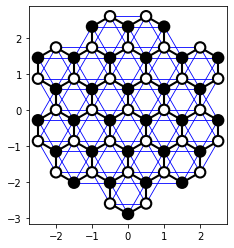

In [14]:
kwant.plot(syst,
           site_color=family_colors,
           hop_color=hopping_colors,
           hop_lw=hopping_lw,
           site_lw=0.1,);

In [19]:
# syst[target, source] 
syst[A(1,0), A(0,0)] # counter-clockwise

0.5j

In [20]:
# syst[target, source]
syst[A(0,1), A(0,0)] # clockwise

0.5j

In [21]:
# syst[target, source]
syst[A(1,-1), A(0,0)] # clockwise

0.5j

In [22]:
A(0,0).pos

array([0.0, 0.0])

In [23]:
A(1,0).pos

array([1.0, 0.0])

In [24]:
A(0,1).pos

array([0.5, 0.8660254037844386])

In [26]:
np.sin(np.radians(60))

0.8660254037844386